# Evaluating Classification Models with ROC AUC
The Titanic data frames describe the survival status of individual passengers on the Titanic.

Source the data from the Kaggle repository here: https://www.kaggle.com/c/titanic/data

Execute the tasks listed below:

* Train 2 classifiers of your choice to, respectively, predict the survival chance of individuals in the dataset and cluster the most "similar" individuals. NB: Apply the required steps up to the model training phase.
* Evaluate the performance of the 2 models using the ROC AUC approach
* Plot the ROC curves using MatPlotLib
* Say which model performed better

In [ ]:
import pandas as pd
import seaborn as sns
import math
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score

### Data import and prep

In [ ]:
url = 'https://raw.githubusercontent.com/DaPlayfulQueen/DE_track_data/master/train.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Sex'] = df['Sex'].replace({'female': 0, 'male': 1})
df = pd.get_dummies(df, columns=['Embarked'])
df['Age'].fillna(df['Age'].median(), inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


### Train test split and scaling

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(MinMaxScaler().fit_transform(X_test), columns=X_test.columns)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1.0,1.0,0.344510,0.000,0.000000,0.015412,0.0,0.0,1.0
1,1.0,0.0,0.205849,0.500,0.333333,0.015469,0.0,0.0,1.0
2,1.0,1.0,0.369721,0.125,0.000000,0.031425,0.0,0.0,1.0
3,1.0,1.0,0.268877,0.000,0.000000,0.014151,0.0,0.0,1.0
4,0.5,0.0,0.558805,0.000,0.000000,0.026350,0.0,0.0,1.0


### Logistic regression & SVC: ROC

In [ ]:
def get_roc_params(X_train, X_test, y_train, y_test):
  log_reg = LogisticRegression(max_iter=3000).fit(X_train, y_train)
  pred_prob_logistic = log_reg.predict_proba(X_test)

  svc = SVC(kernel='rbf', probability=True).fit(X_train, y_train)
  pred_prob_svc = svc.predict_proba(X_test)

  k = int(math.sqrt(len(X_train)))
  k = k if k % 2 != 0 else k + 1
  knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
  pred_prob_knn = knn.predict_proba(X_test)

  return (pred_prob_logistic, pred_prob_svc, pred_prob_knn)



def plot_rocs(pred_prob_logistic, pred_prob_svc, pred_prob_knn):
  fpr1, tpr1, threshold1 = roc_curve(y_test, pred_prob_logistic[:, 1], pos_label=1)
  fpr2, tpr2, threshold2 = roc_curve(y_test, pred_prob_svc[:, 1], pos_label=1)
  fpr3, tpr3, threshold3 = roc_curve(y_test, pred_prob_knn[:, 1], pos_label=1)

  sns.lineplot(x=fpr1, y=tpr1, label='Logistic regression ROC')
  sns.lineplot(x=fpr2, y=tpr2, color='red', label='SVC ROC')
  sns.lineplot(x=fpr3, y=tpr3, color='green', label='KNN ROC')

  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.show()

def print_aucs(pred_prob_logistic, pred_prob_svc, pred_prob_knn):
  auc1 = roc_auc_score(y_test, pred_prob_logistic[:, 1])
  auc2 = roc_auc_score(y_test, pred_prob_svc[:, 1])
  auc3 = roc_auc_score(y_test, pred_prob_knn[:, 1])

  print(f'AUC for logistic regression {round(auc1, 3)}')
  print(f'AUC for SVC regression {round(auc2, 3)}')
  print(f'AUC for KNN regression {round(auc3, 3)}')

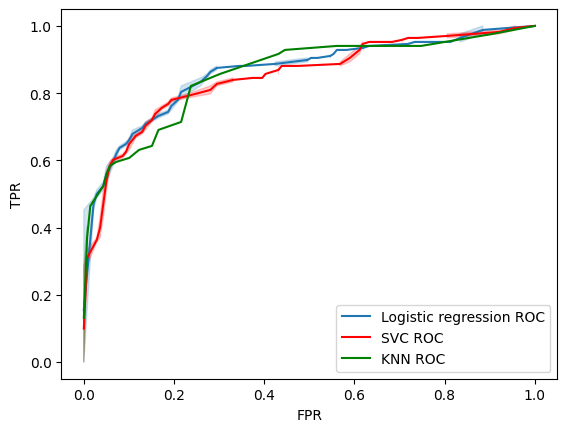

In [ ]:
pred_prob_logistic, pred_prob_svc, pred_prob_knn = get_roc_params(X_train, X_test, y_train, y_test)
plot_rocs(pred_prob_logistic, pred_prob_svc, pred_prob_knn)

Looks Logistic regression is doing slightly better, as it leaning more in the left upper angle. Its AUC is obviously bigger. Let's calculate it!

In [ ]:
 print_aucs(pred_prob_logistic, pred_prob_svc, pred_prob_knn)

AUC for logistic regression 0.865
AUC for SVC regression 0.849
AUC for KNN regression 0.857


So, yes, logistic regression is doing slightly better. praise feature scaling! Let's try without it.

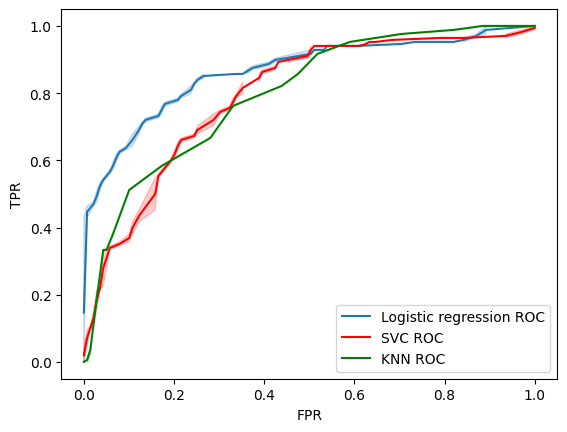

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pred_prob_logistic, pred_prob_svc, pred_prob_knn = get_roc_params(X_train, X_test, y_train, y_test)
plot_rocs(pred_prob_logistic, pred_prob_svc, pred_prob_knn)

Looks like SVC and KNN are very affected by feature scaling!

In [ ]:
 print_aucs(pred_prob_logistic, pred_prob_svc, pred_prob_knn)

AUC for logistic regression 0.865
AUC for SVC regression 0.793
AUC for KNN regression 0.797


And indeed... The moral of the story: SCALE!!